# Cohort Analysis by Time-based

Cohort Analysis is an analytical techniques that focuses on analyzing the behavior of a group of users/customers over time, thereby uncovering insights about the experiences of those customers, and what companies can do to better those experiences. So, We can use it to measure changes in user behavior.

For instance, If we compare the data for the time period when we opened the campaign and other data, then we can compare week that got campaign with other week.

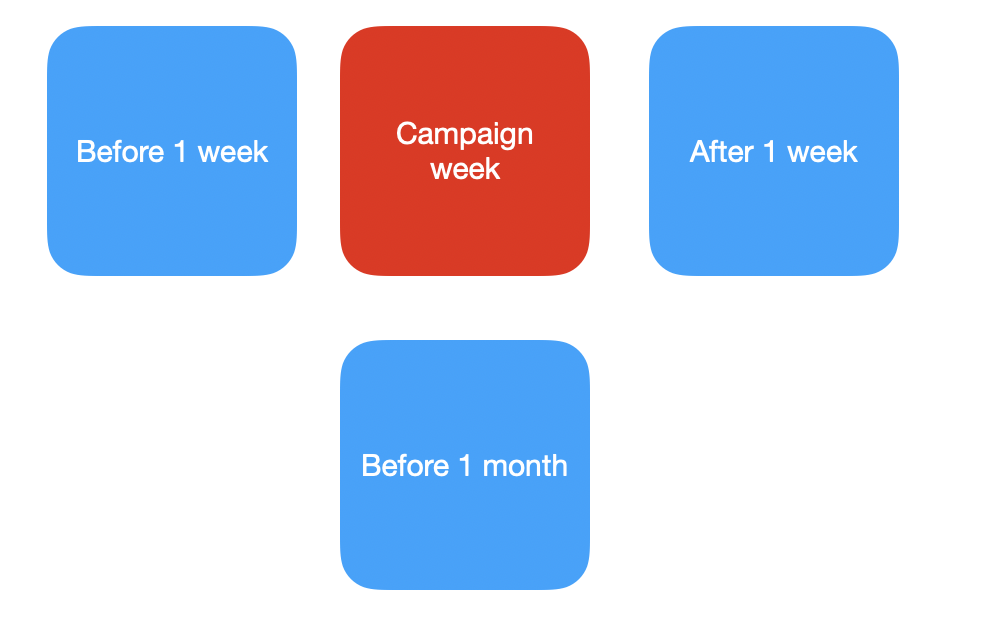

In [1]:
from IPython.display import Image
Image(filename='cohort1.png', width=500)

This mean is when we run a campaign, we will see the difference between campaign week and other weeks. So, We can use collected weekly data to get insights from them.  To wrap it up, A cohort is a set a people who have experienced the same event during the same period.

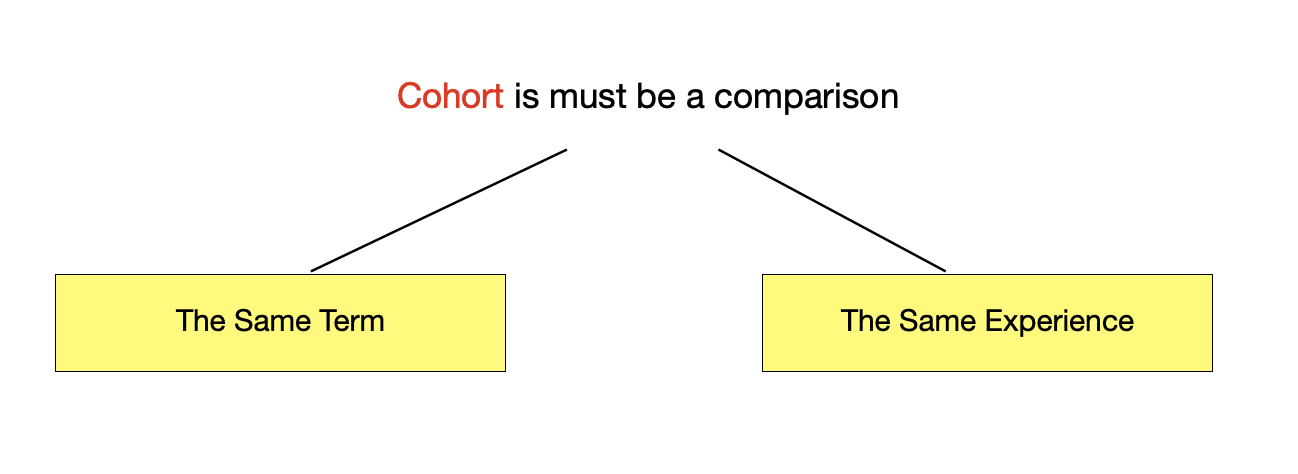

In [2]:
Image(filename='cohort2.png', width=700)

### Cohort Analysis is 

* Mutually exclusive segments


* Compare metircs across Product lifecycle


* Compare metrics across Customer lifecycle

### Types of Cohorts

* Time Cohorts


* Behavior Cohorts


* Size Cohorts

### Elements of Cohorts

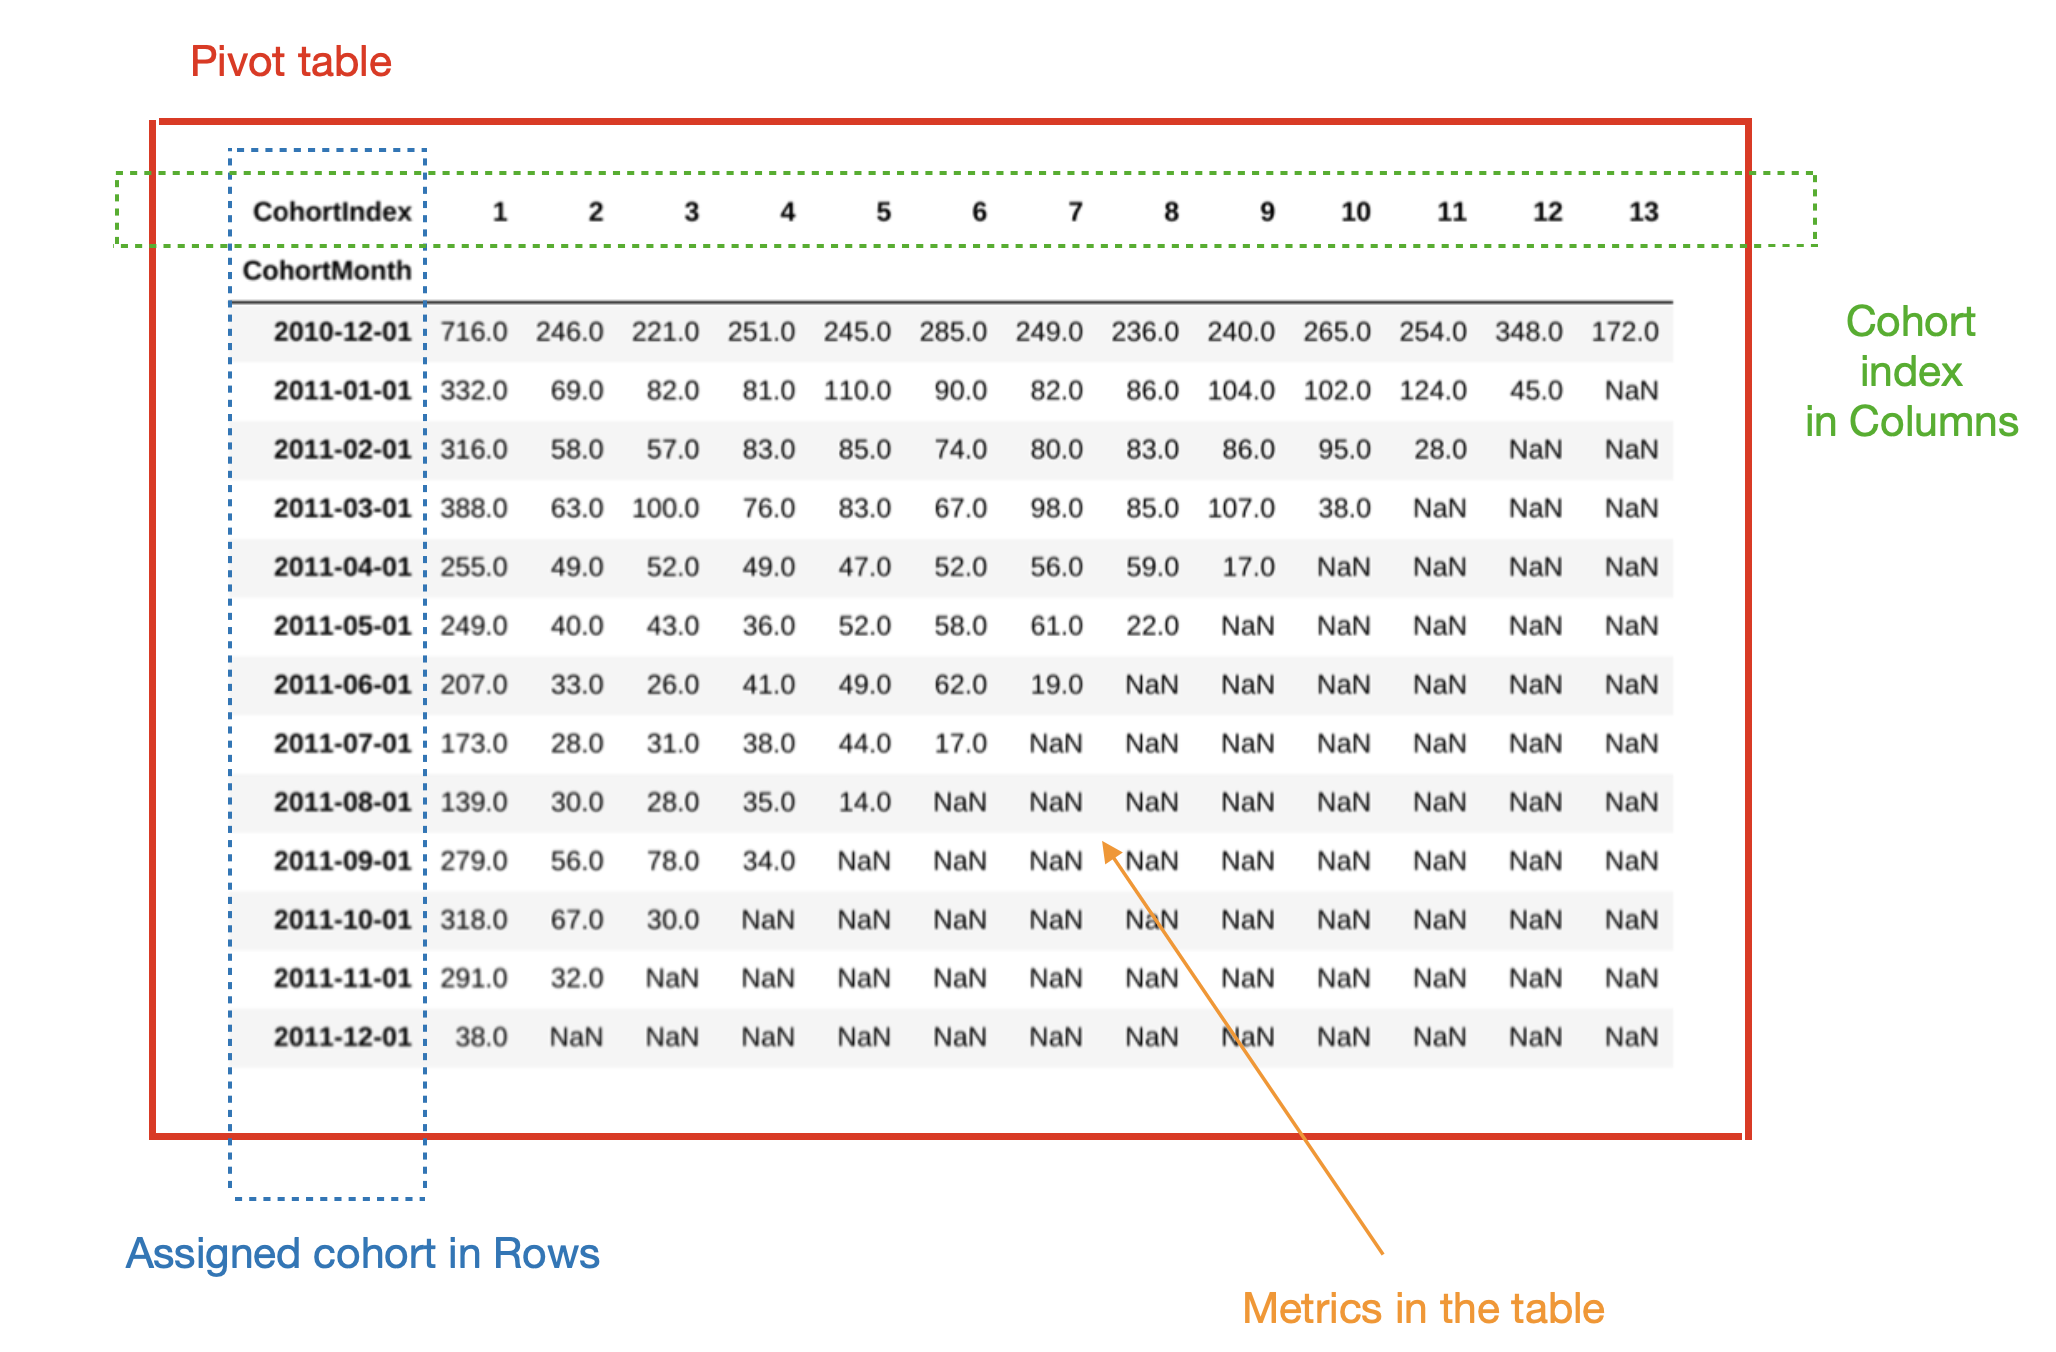

In [3]:
Image(filename='cohort3.png', width = 800)

And compare customer A and B

* First cohort was acquired in 12 / 2010


* Last cohort was acquired in 12 / 2011

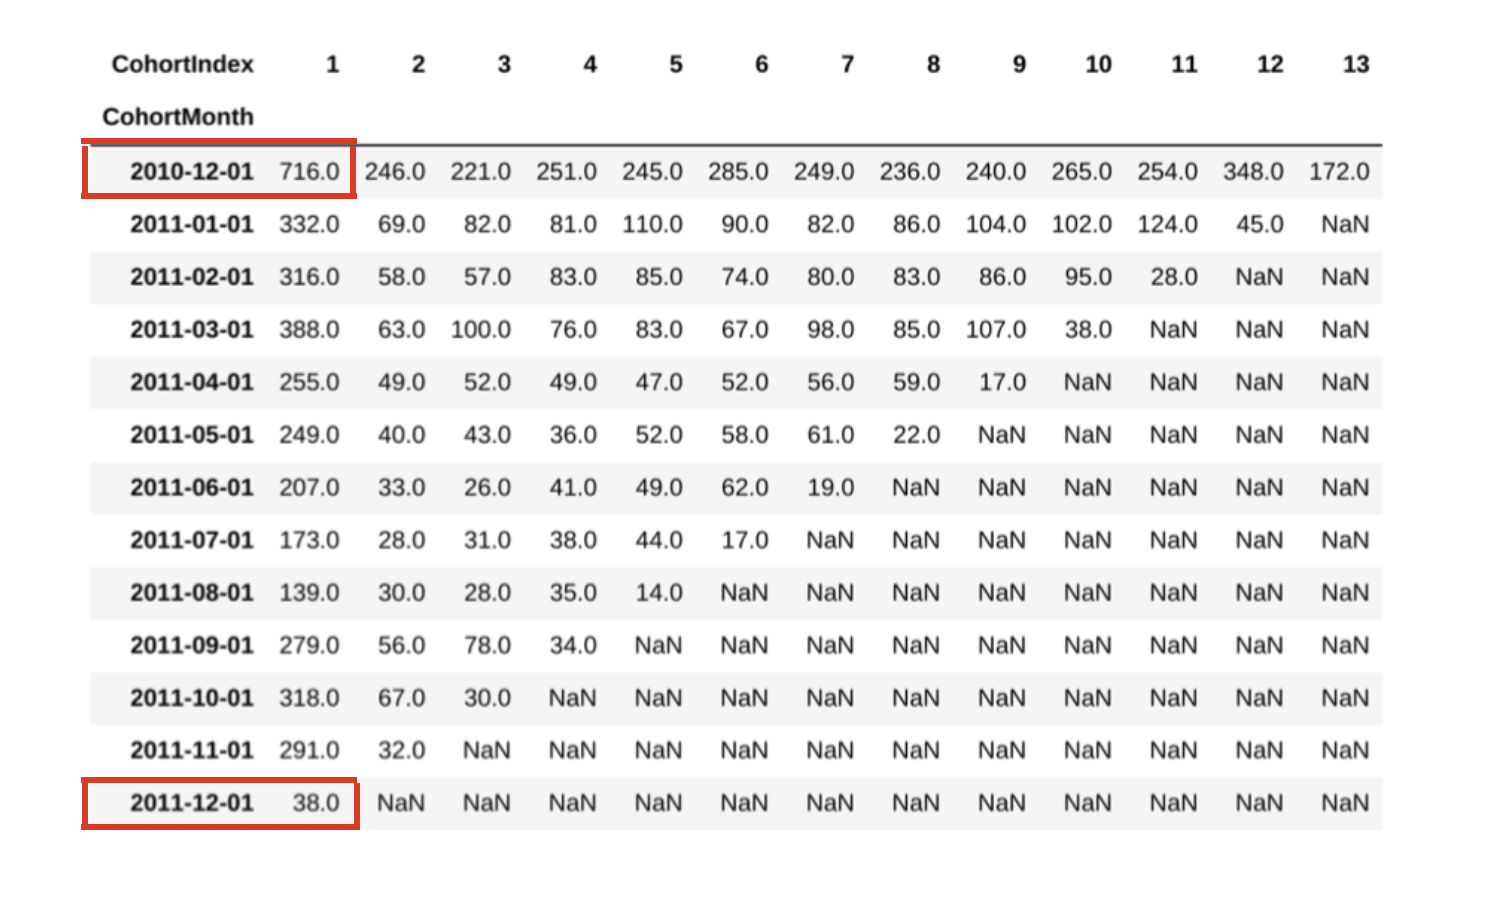

In [4]:
Image(filename='cohort4.png', width=700)

In this the cohort exercise, I will learn how to analyze data and classification with the UCI Data Repository contains 541,909 transactions of a UK-based non-store retail that sells all-occassion gifts from https://towardsdatascience.com/@finnqiao and https://github.com/karolisurbonas. and https://www.datacamp.com/ . This dataset is an online retail and I downloat this here: http://archive.ics.uci.edu/ml/datasets/online+retail

In [5]:
import pandas as pd
import datetime as dt

In [6]:
%ls

Cohort analysis.ipynb  cohort1.png            cohort4.png
EDA_ecommerce.ipynb    cohort2.png            ecommerce.csv*
Online_Retail.xlsx*    cohort3.png            online.csv


In [7]:
df = pd.read_excel('Online_Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.shape

(541909, 8)

### 1. Assign acquisition Month cohort

In [9]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

df['Invoice_month'] = df['InvoiceDate'].apply(get_month)

In [10]:
df['cohort_month'] = df.groupby('CustomerID')['Invoice_month'].transform('min')

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,cohort_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [12]:
# Define function to extract year, month, day

def get_datetime(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

### 2. Assign time offset value

In [13]:
invoice_year, invoice_month, _ = get_datetime(df, 'Invoice_month')
cohort_year, cohort_month, _ = get_datetime(df, 'cohort_month')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

* cohort_index: It will allow us to normalize the metrics and compare them for each monthly cohort. Then we can get performance of each monthly cohort for given nth month after customer's acquistion.

In [14]:
# Diff beween the dates, and add one in order to have one based indexing which is easier to interpret it.
#  13 is difference by month
df['cohort_index'] = years_diff * 12 + months_diff +1
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,cohort_month,cohort_index
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5.0


In [15]:
df.cohort_index.unique()

array([ 1., nan,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13.])

### 3. Count monthly active customer from each cohort

In [16]:
grouping = df.groupby(['cohort_month', 'cohort_index'])

In [17]:
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data.head()

,cohort_month,cohort_index,CustomerID
0,2010-12-01,1.0,948
1,2010-12-01,2.0,362
2,2010-12-01,3.0,317
3,2010-12-01,4.0,367
4,2010-12-01,5.0,341


### 4. Build the cohorts table

In [18]:
# Pivot(column name for row index, column name for col index, column name for value)

cohort_counts = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='CustomerID')
cohort_counts

cohort_index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort_month,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reference: https://datascienceschool.net/view-notebook/76dcd63bba2c4959af15bec41b197e7c/

### 5. Calculate cohort metrics

### 5-1. Customer Retention rate

* How many customer originally in each cohort in 'cohort_counts' table?

In [19]:
# Calculate retention rate : It is the proportion of earnings kept back in the business 

# Extract cohort size on the first month
# Store the first column 
cohort_sizes = cohort_counts.iloc[: , 0]
cohort_sizes

cohort_month
2010-12-01    948.0
2011-01-01    421.0
2011-02-01    380.0
2011-03-01    440.0
2011-04-01    299.0
2011-05-01    279.0
2011-06-01    235.0
2011-07-01    191.0
2011-08-01    167.0
2011-09-01    298.0
2011-10-01    352.0
2011-11-01    321.0
2011-12-01     41.0
Name: 1.0, dtype: float64

In [30]:
# Divide all values in cohort_counts table by cohort_sizes
# This mean is that divide the number of active purchases from each cohort by the size of cohort
# The result is a retention metric per each monthly cohort

retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100

cohort_index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort_month,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reference: http://blog.igaworks.com/shopmag201610/, 
https://www.braze.com/blog/calculate-retention-rate/, https://www.investopedia.com/terms/r/retentionratio.asp

### 5-2. Average quantity for each cohort

In [27]:
grouping = df.groupby(['cohort_month', 'cohort_index'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
avg_quantity = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='Quantity')
avg_quantity.round(1)

cohort_index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort_month,,,,,,,,,,,,,
2010-12-01,11.0,14.6,15.0,14.8,12.9,14.3,15.2,14.8,16.7,16.7,17.3,12.8,14.8
2011-01-01,10.0,12.6,12.3,10.9,12.2,14.9,14.2,14.4,11.4,9.9,9.1,9.5,NaN
2011-02-01,10.8,12.1,18.6,12.0,11.1,11.4,13.3,12.4,10.3,11.9,12.6,NaN,NaN
2011-03-01,9.8,9.9,12.2,9.5,13.6,12.3,13.2,12.2,10.5,8.9,NaN,NaN,NaN
2011-04-01,9.8,10.1,9.4,11.6,11.5,8.2,9.7,9.3,7.3,NaN,NaN,NaN,NaN
2011-05-01,10.9,9.0,13.9,11.8,10.9,8.7,10.1,7.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,13.7,10.5,13.3,10.2,9.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.7,7.1,7.8,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.9,6.0,5.3,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 6. Build the Heatmap for Retention rate

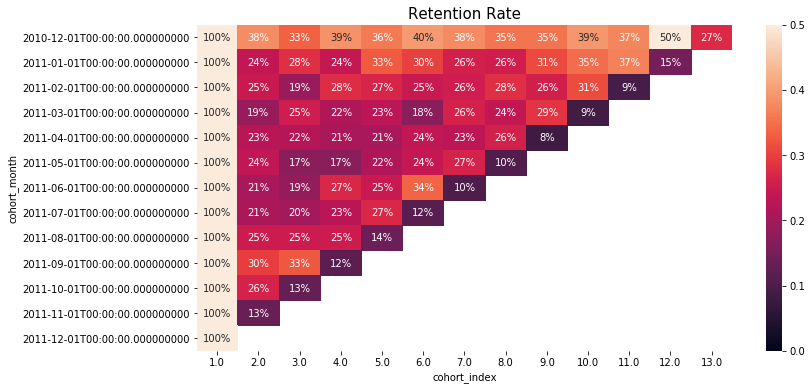

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.title("Retention Rate", fontsize=15)
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5)
plt.show()

A look at the retention rates across cohorts indicate strong sustained engagement from the 2010–12 cohort. As these are existing customers, this is quite intuitive. And also this table indicate that it only contained one year data.